## Notebook for downloading ground truth annotations (X-ray data)

___This notebook demonstrates how to pull down raw X-ray image data and manual annotations from NeuroData.___

Before running, you need to install NeuroData's [ndio package](http://github.com/neurodata/ndio). The simplest way to install ndio is to use pip.

If you use any of the data or annotations in your work, please cite this [paper](http://arxiv.org/abs/1604.03629). 

For more information about the methods used to collect and analyze these data, visit xbrain's [webpage](http://docs.neurodata.io/xbrain).

### Details about the annotations (channels)
- NmapV0A1 = Dense neurons in volume V0 labeled by annotator A1
- NmapV0A0 = Dense neurons in volume V0 labeled by annotator A0
- VmapV0A1 = Dense vessels in volume V0 labeled by annotator A1
- VmapV0A0 = Dense vessels in volume V0 labeled by annotator A0
- NmapV1A0 = Dense neurons in volume V1 labeled by annotator A0
- VmapV1A0 = Dense vessels in volume V1 labeled by annotator A0
- NmapV2A1A2 = Dense neurons in volume V2 labeled by annotator A1/A2
- NmapV2A2 = Dense neurons in volume V2 labeled by annotator A2
- VmapV2A2 = Sparse vessels in volume V2 labeled by annotator A2
- NmapV3A0A3 = Sparse neurons in volume V3 labeled by annotator A0/A3 (cell centroids)

### Details about the volumes
- V0 = 150x150x100 pixels (0.65 micron pixel size)
- V1 = 300x300x100 pixels (0.65 micron pixel size)
- V2 = 200x200x100 pixels (0.65 micron pixel size)
- V3 = 200x200x200 pixels (0.65 micron pixel size)

----------

### 1. Select which annotation you want to download

In [1]:
# Specify which of the 10 manual annotations you want to pull down
channels = ['NmapV0A1', 'NmapV0A0', 'VmapV0A1', 'VmapV0A0', 
       'NmapV1A0', 'VmapV1A0', 'NmapV2A1A2',
       'NmapV2A2', 'VmapV2A2', 'NmapV3A0A3']

annovol = 4 # select which volume to pull down (0-9)

### 2. Define the spatial coordinates of each subvolume

In [2]:
# (x,y,z) coordinates for all volumes (xstart,xstop,ystart,ystop,zstart,zstop)
V0_coord = [1425, 1575, 1925, 2075, 395, 495]
V1_coord = [1350, 1650, 1850, 2150, 395, 495]
V2_coord = [1450, 1650, 1450, 1650, 895, 995]
V3_coord = [1200, 1400, 1650, 1850, 1126, 1326]

# compile all annotation coordinates
coords = [V0_coord,V0_coord,V0_coord,V0_coord,
          V1_coord,V1_coord,V2_coord,V2_coord,
          V2_coord,V2_coord,V3_coord]

print(channels)

['NmapV0A1', 'NmapV0A0', 'VmapV0A1', 'VmapV0A0', 'NmapV1A0', 'VmapV1A0', 'NmapV2A1A2', 'NmapV2A2', 'VmapV2A2', 'NmapV3A0A3']


### 3. Download image data + annotation

In [3]:
import ndio.remote.neurodata as neurodata
import time
nd = neurodata()

imtoken = 'S1_proj4'
annotoken = 'xbrain_rfr1'

# pull down image
im = nd.get_cutout(imtoken,'image', coords[annovol][0],coords[annovol][1],coords[annovol][2],coords[annovol][3],coords[annovol][4],coords[annovol][5],resolution = 0)

# pull down annotation in same volume
anno = nd.get_cutout(annotoken,channels[annovol], coords[annovol][0],coords[annovol][1],coords[annovol][2],coords[annovol][3],coords[annovol][4],coords[annovol][5],resolution = 0)


### 4. Plot image + annotation

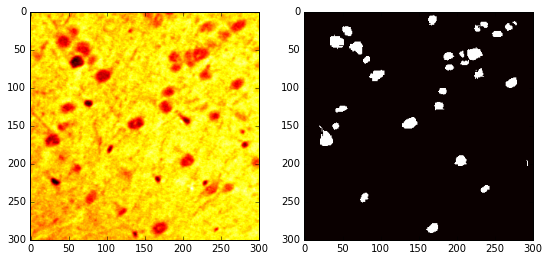

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

plt.figure(figsize=(9, 9))
plt.subplot(121) # equivalent to: plt.subplot(2, 2, 1)
plt.imshow(im[0:1400,0:2400,3],cmap="hot")

plt.subplot(122) # equivalent to: plt.subplot(2, 2, 1)
plt.imshow(anno[0:1400,0:2400,3],cmap="hot")
